<a href="https://colab.research.google.com/github/Rohith2864/Naan-Mudhalvan-Final-Project/blob/main/Digit_Recognizer_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


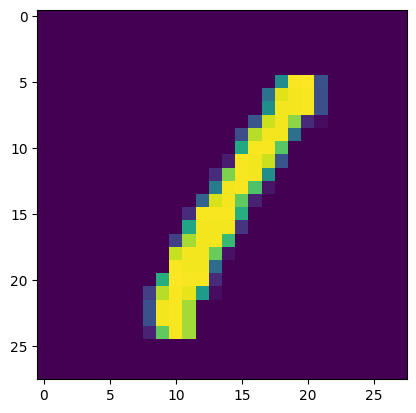

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2844 - accuracy: 0.9188 - val_loss: 0.1594 - val_accuracy: 0.9561
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1261 - accuracy: 0.9622 - val_loss: 0.1118 - val_accuracy: 0.9678
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9742 - val_loss: 0.0992 - val_accuracy: 0.9703
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0.0930 - val_accuracy: 0.9725
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0382 - accuracy: 0.9888 - val_loss: 0.0820 - val_accuracy: 0.9749
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0901 - val_accuracy:

In [11]:
y_pb = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pd = y_pb.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pd)

0.9779

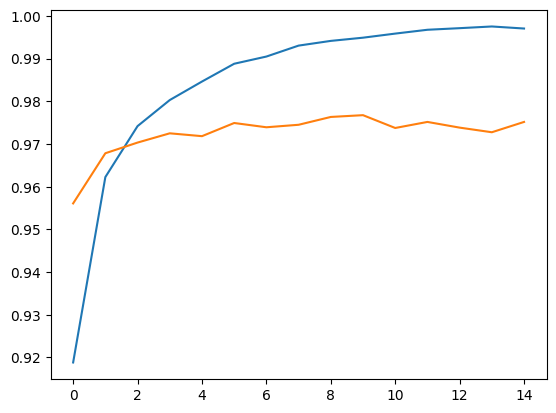

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

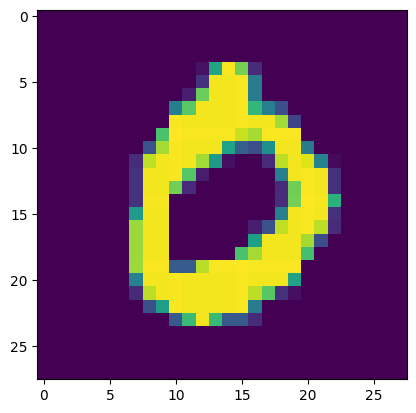

In [15]:
plt.imshow(X_test[3])

In [16]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 38ms/step


array([0])

In [20]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_values = test.values

In [21]:
print(test_values.shape)
print(X_test.shape)

(28000, 784)
(10000, 28, 28)


In [22]:
test_values_reshaped = test_values.reshape(28000, 28, 28)
test_values_reshaped.shape

(28000, 28, 28)

In [23]:
test_out = model.predict(test_values_reshaped)

875/875 [==============================] - 1s 2ms/step


In [24]:
y =test_out.argmax(axis=1)
submission = pd.DataFrame(y, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv('/kaggle/working/submission.csv')
print('Submission completed!')

Submission completed!
